In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Pour de beaux graphiques scientifiques

Afin d'être dans un style proche de ce qui se fait dans les publications scientifiques nous allons utiliser un style SciencePlots (voir https://github.com/garrettj403/SciencePlots pour mieux se rendre compte des effets).

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

# Des graphiques simplement

## Des lignes et des points

Le tracé d'une courbe est extrêmement aisé:

In [3]:
# Pour préserver la reproductibilité des résultats
rng = np.random.default_rng(2021)

NB: Eviter d'utiliser `np.random.seed(number)`
(cf https://numpy.org/neps/nep-0019-rng-policy.html#numpy-random)

In [4]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*rng.standard_normal(len(x))

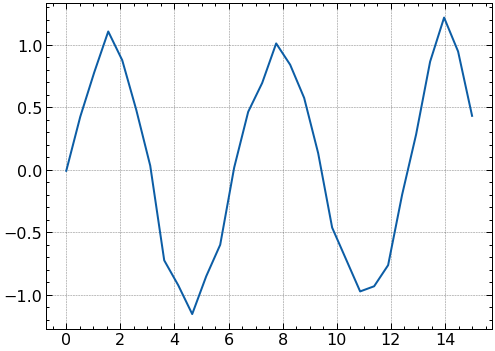

In [5]:
plt.plot(x,y)

On peut y modifier les symboles, les couleurs, l'épaisseurs des traits... (ça me rappelle un peu [Gnuplot](http://www.gnuplot.info))

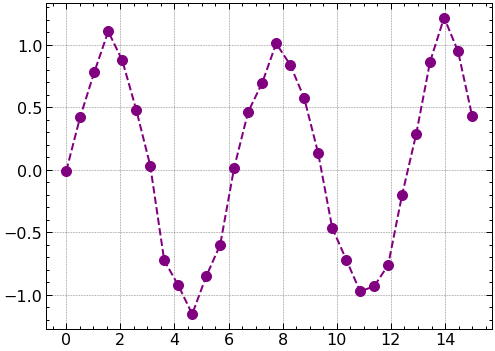

In [6]:
plt.plot(x,y, 'o--', color='purple', lw=2, ms=10)

Un redimensionnement de la figure prend d'abort en compte le rapport d'aspect (*width* vs *height*). Cela nous sera particulièrement utile quand nous grouperons des graphiques.

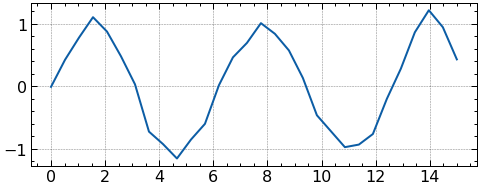

In [7]:
plt.figure(figsize=(8,3))
plt.plot(x,y)

Des labels sur les axes...

In [8]:
plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Intensité [I]')
plt.title('Intensity du signal en fonction du temps')
plt.show()

Une légende...

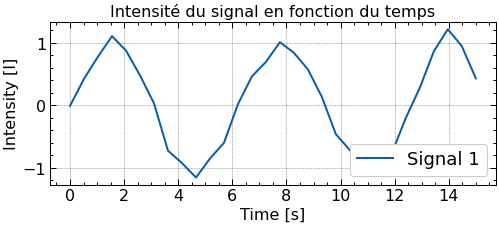

In [9]:
plt.figure(figsize=(8,3))
plt.plot(x,y, label='Signal 1')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Intensity [I]')
plt.title('Intensité du signal en fonction du temps')
plt.legend(loc='lower right', fontsize=18)
plt.show()

Une fois que vous savez en faire un, vous pouvez les empiler

In [10]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

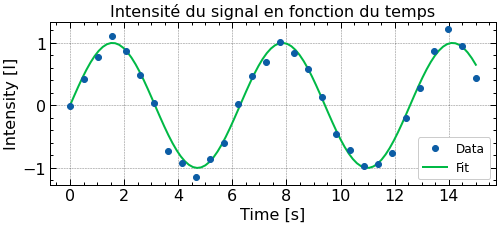

In [11]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Intensity [I]')
plt.title('Intensité du signal en fonction du temps')
plt.legend(loc='lower right', fontsize=12)
plt.show()

Posons des limites pour cadrer sur notre centre d'intérêt

In [12]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Intensity [I]')
plt.title('Intensité du signal en fonction du temps')
plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.ylim(top=2)
plt.xlim(left=0, right=4*np.pi)
plt.show()

## Histogrames

Ce n'est pas bien plus compliqué

In [13]:
res = rng.standard_normal(1000)*0.2 + 0.4

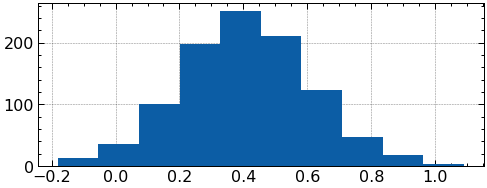

In [14]:
plt.figure(figsize=(8,3))
plt.hist(res)
plt.show()

Le principal paramètre est le nombre de `bins`

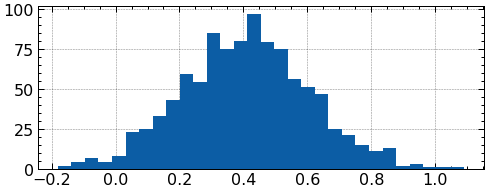

In [15]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30)
plt.show()

Convert to density plot

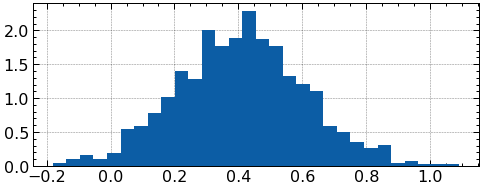

In [16]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True)
plt.show()

Si vous devez superposer ce style de graphique, il peut être utile d'employer différents styles pour les `bins`.

In [17]:
res2 = rng.standard_normal(1000)*0.2 + 0.4

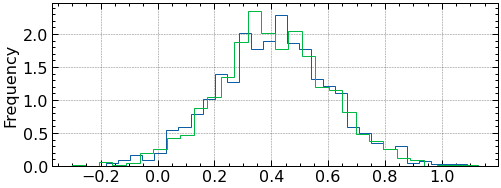

In [18]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True, histtype='step')
plt.hist(res2, bins=30, density=True, histtype='step')
plt.ylabel('Frequency')
plt.show()

# Pour aller un peu plus loin

Matplotlib permet des tracés plus élaborés:

* Multiple *subplots* réunis en une figure
* Ajout de texte ou de marqueur sur les tracés
* Animation de graphiques (avec export)

## un axe, une figure

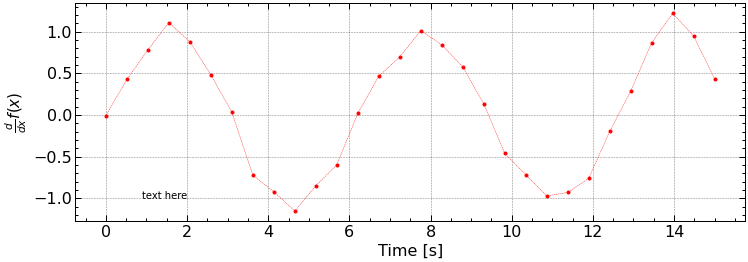

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes) # <- text
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
plt.show()

Attention: les unités pour placer le texte sont dans $[0:1]^2$ relativement au bord inférieur gauche de la figure.

## Plusieurs axes, une figure

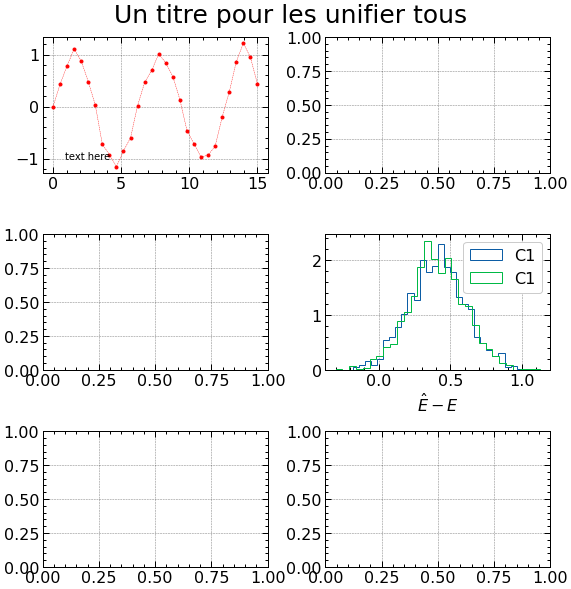

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(8,8))
ax = axes[0][0]
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax = axes[1][1]
ax.hist(res, bins=30, density=True, histtype='step', label='C1')
ax.hist(res2, bins=30, density=True, histtype='step', label='C1')
ax.set_xlabel('$\hat{E}-E$')
ax.legend()
fig.tight_layout()
fig.suptitle('Un titre pour les unifier tous', y=1.03, fontsize=25)
plt.show()

(notez qu'il reste des cases `subplots` vides)

# Exemple

In [21]:
res_a1 = 0.2*rng.standard_normal(1000)+0.4
res_b1 = 0.25*rng.standard_normal(1000)+0.4
res_a2 = 0.21*rng.standard_normal(1000)+0.3
res_b2 = 0.22*rng.standard_normal(1000)+0.3

Si votre légende est complexe (en particulier, si elle contient des calculs), il est recommandé de la construire au préalable.

In [22]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

*Plot it!*

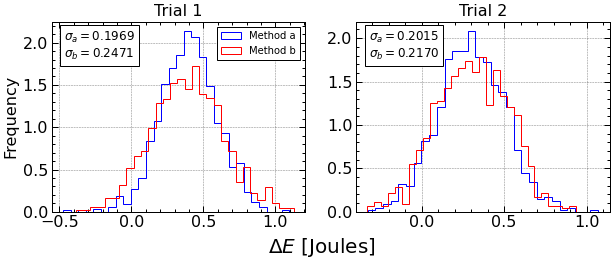

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))
ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='Method a', color='blue')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='Method b', color='red')
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)

ax.legend(fontsize=10, fancybox=False, edgecolor='black')
ax.set_ylabel('Frequency')
ax.set_title('Trial 1')
ax = axes[1]
ax.hist(res_a2, bins=30, density=True, histtype='step', label='Method 1', color='blue')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='Method 2', color='red')
ax.text(0.05, 0.81, textstr2, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha='center', size=20)
plt.savefig('trial.png', dpi=200)
plt.show()

# Passage au 2D

Revenons au style par défaut

In [24]:
plt.style.use(['default'])

In [25]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

## *Contour plot* avec remplissage

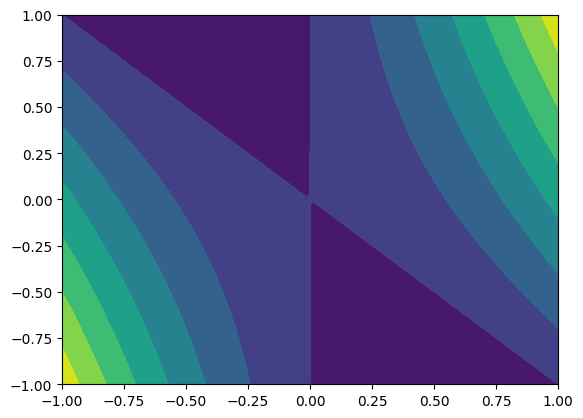

In [26]:
plt.contourf(x,y,z)

Il est possible de raffiner le tracé en modifiant le nombre de niveaux (`levels`) ainsi que la `colormap`:

* See https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

En cas de saturation de la plage des couleurs, un règlable des paramètres `vmin` et `vmax` peut être utile.

* See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

Text(0, 0.5, 'Vertical Position [m]')

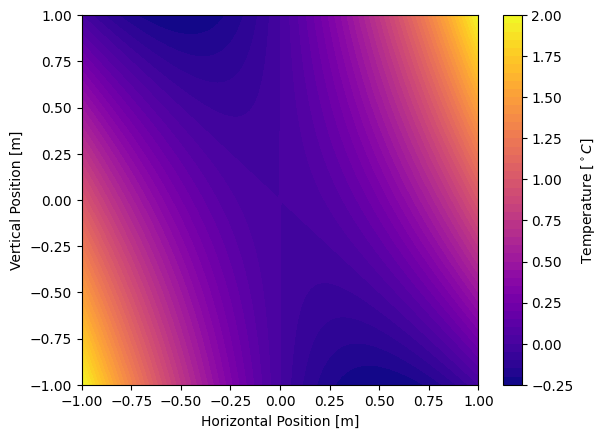

In [27]:
plt.contourf(x,y,z, levels=50, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

## *Contour plot* (sans remplissage)

L'affichage de lignes de niveaux peut être plus clair (en particulier dans les articles)

<a list of 28 text.Text objects>

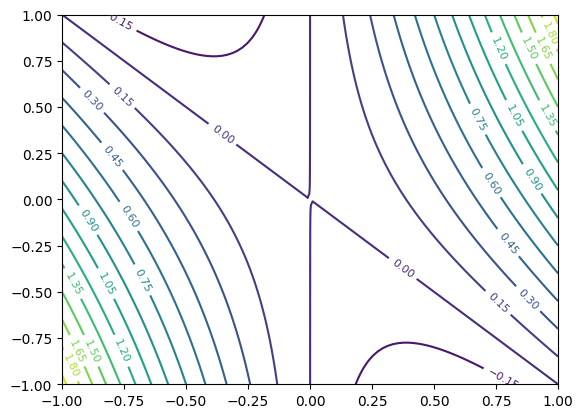

In [28]:
cs = plt.contour(x,y,z, levels=20)
plt.clabel(cs, fontsize=8)

## Et encore une dimension: le 3D

Le tracé 3D statique n'est pas souvent une bonne idée. 

Néanmoins, l'emploi d'une animation peut permettre d'expliciter les éléments masqués (à suivre ci-dessous).

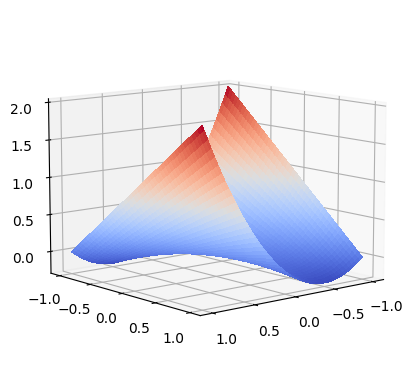

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=50)

## *Stream Plots*

Le *stream plot* est idéal pour tracé des champs

In [30]:
w = 3
_ = np.linspace(-3,3,100)
X, Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

Voici un graphique multiple avec quelques variations:

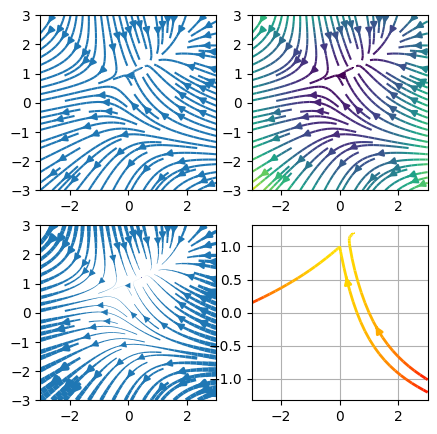

In [31]:
fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
seed_points = np.array([[0,1], [1,0]])
ax.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points)
ax.grid()

# Rendu d'image

Matplotlib n'est pas la meilleure bibliothèque pour manipuler des images et en même temps il répond déjà aux principaux besoins.

In [32]:
im = plt.imread('images/flower.png')

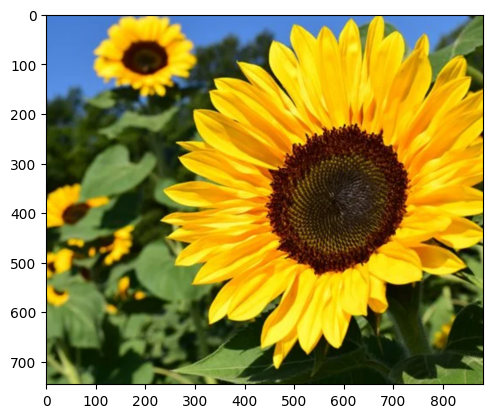

In [33]:
plt.imshow(im)

# Animations

Les animations permettent d'ajouter une dimension dynamique aux graphiques.

In [34]:
def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T) # F contient tous les points en espace x temps

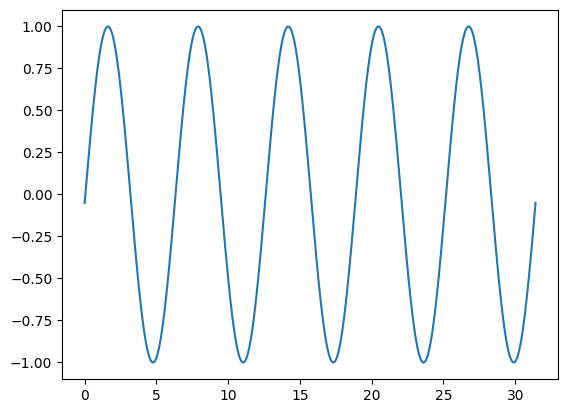

In [35]:
plt.plot(x, F[1]) # pour un temps particulier

Créons un fichier d'animation

In [36]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

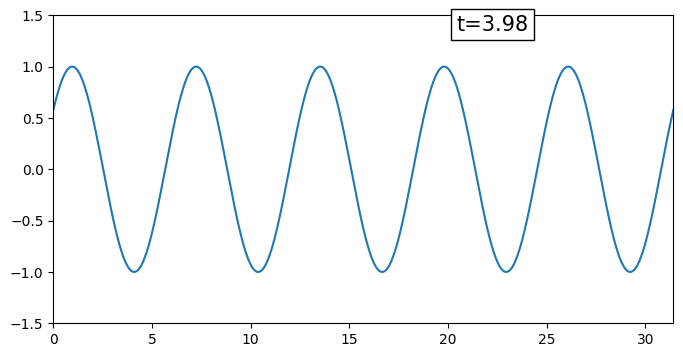

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('images/ani.gif',writer='pillow',fps=50,dpi=100)

Cela peut aussi être commode pour animer une courbe en 3D

In [38]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

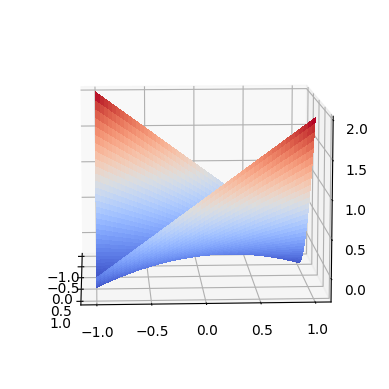

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('images/ani2.gif',writer='pillow',fps=30,dpi=100)

Et plus encore dans la `Gallery`.